In [1]:
from itertools import combinations

In [7]:
with open('input22.txt', "r") as file:
        text = file.read().strip().split('\n')

In [8]:
text

['Hit Points: 51', 'Damage: 9']

In [23]:
import random

min_mana = 100000000

def fight():

    mana_used = 0

    boss_hp = 51
    boss_dmg = 9

    player_hp = 50
    player_mp = 500
    player_armor = 0

    spells = [['Magic Missile', 53],['Drain', 73],['Shield', 113],['Poison', 173],['Recharge', 229]]

    turn = 'player'

    shield_active = False
    shield_count = 0

    poison_active = False
    poison_count = 0

    recharge_active = False
    recharge_count = 0

    while True:

        if shield_active:
            player_armor = 7
            shield_count += 1
            if shield_count == 6:
                shield_active = False
        else:
            player_armor = 0

        if poison_active:
            boss_hp -= 3
            if boss_hp <= 0:
                return ['player wins', mana_used]
            poison_count += 1
            if poison_count == 6:
                poison_active = False

        if recharge_active:
            player_mp += 101
            recharge_count += 1
            if recharge_count == 5:
                recharge_active = False

        if turn == 'player':

         #   uncomment this section for part 2
            player_hp -= 1
            if player_hp <= 0:
                return ['boss wins', mana_used]

            spell = None

            random.shuffle(spells)

            for s in spells:
                if player_mp >= s[1]:
                    if s[0] == 'Shield':
                        if shield_active:
                            continue
                    if s[0] == 'Poison':
                        if poison_active:
                            continue
                    if s[0] == 'Recharge':
                        if recharge_active:
                            continue
                    spell = s 
                    break

            if spell == None:
                return ['boss wins', mana_used]

            player_mp -= spell[1]
            if player_mp < 0:
                player_mp = 0

            mana_used += spell[1]

            if spell[0] == 'Magic Missile':
                boss_hp -= 4
                if boss_hp <= 0:
                    return ['player wins', mana_used]

            if spell[0] == 'Drain':
                boss_hp -= 2
                if boss_hp <= 0:
                    return ['player wins', mana_used]
                player_hp += 2

            if spell[0] == 'Shield':
                player_armor = 7
                shield_active = True
                shield_count = 0

            if spell[0] == 'Poison':
                poison_active = True
                poison_count = 0

            if spell[0] == 'Recharge':
                recharge_active = True
                recharge_count = 0

            turn = 'boss'

        else:

            dmg = boss_dmg - player_armor

            if dmg < 1:
                dmg = 1

            player_hp -= dmg

            if player_hp <= 0:
                return ['boss wins', mana_used]

            turn = 'player'


#result = fight()
results = []
n = 0
while n < 10000:
    result = fight()
    if result[0] == 'player wins':
        results.append(result[1])
        if result[1] < min_mana:
            min_mana = result[1]
    n += 1

In [19]:
import pandas as pd

In [28]:
pd.Series(results).sort_values()

42    1216
34    1242
36    1242
13    1309
3     1329
4     1329
40    1349
20    1369
23    1382
33    1402
31    1422
10    1442
6     1448
30    1448
21    1462
14    1475
25    1475
7     1475
15    1485
39    1485
32    1495
27    1495
0     1495
22    1495
19    1495
1     1495
11    1495
35    1505
45    1538
17    1538
2     1558
5     1558
44    1558
12    1558
24    1618
37    1651
28    1691
26    1704
41    1744
16    1744
9     1744
38    1764
18    1764
8     1910
43    1910
29    2003
dtype: int64

<Axes: >

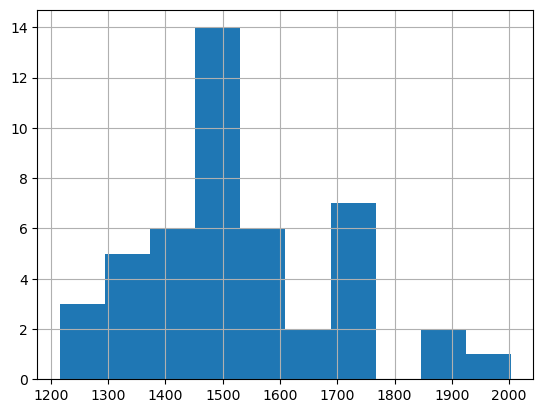

In [24]:
pd.Series(results).hist()